Employee Burnout Analysis

import warnings is used to supress warning messages in Python

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#installing plotly
!pip install plotly

In [3]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# import the dataset from excel
import pandas as pd

# Read the Excel file (assuming it's in the same directory)
data = pd.read_excel('employee_burnout_analysis.xlsx')

In [8]:
#Using head function printing the first five records
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [9]:
#using tail function printing the last five records
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [10]:
data.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [11]:
#displaying some columns data types
data['WFH Setup Available'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data ['Designation'].unique()

array([2, 1, 3, 0, 4, 5])

In [13]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
data.shape

(22750, 9)

In [15]:
data.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [16]:
#checking for null values in datasets
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [19]:
# Check the actual column names in the DataFrame
print(data.columns)

# If there is a typo, correct the column name in the code:
# Assuming the column name is 'Date of Joining' (with a space):
data['Data of joining'] = pd.to_datetime(data['Date of Joining'])

# If the column does not exist, you might need to create it or re-import the data.
# If you are unsure of the column names, you can use the following to print the column names:

# Print all column names in the DataFrame
for col in data.columns:
    print(col)

# Then, replace 'Date of joining' with the correct column name found in the output.

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')
Employee ID
Date of Joining
Gender
Company Type
WFH Setup Available
Designation
Resource Allocation
Mental Fatigue Score
Burn Rate
Data of joining


In [20]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Data of joining
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,2008-09-30
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,2008-11-30
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,2008-03-10
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,2008-11-03
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,2008-07-24


In [21]:
#The data.info() method in Pandas provides a concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
 9   Data of joining       22750 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 1.7+ MB


In [22]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'Data of joining'],
      dtype='object')

In [23]:
data.isna()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Data of joining
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
22745,False,False,False,False,False,False,False,True,False,False
22746,False,False,False,False,False,False,False,False,False,False
22747,False,False,False,False,False,False,False,True,False,False
22748,False,False,False,False,False,False,False,False,False,False


In [24]:
data.isna().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124
Data of joining,0


In [25]:
data.duplicated().sum()

0

In [26]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Data of joining
count,22750,22750.000000,21369.000000,20633.000000,21626.000000,22750
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005,2008-07-01 09:28:05.274725120
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,2008-01-01 00:00:00
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000,2008-04-01 00:00:00
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000,2008-07-02 00:00:00
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000,2008-09-30 00:00:00
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000,2008-12-31 00:00:00
std,NaN,1.135145,2.047211,1.920839,0.198226,NaN


EXPLORATORY DATA ANALYSIS

In [27]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [28]:
data = data.dropna()

In [29]:
data.shape

(18590, 10)

In [30]:
data = data.drop('Employee ID', axis=1)

In [31]:
data.head()


,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Data of joining
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,2008-09-30
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,2008-11-30
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,2008-11-03
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,2008-07-24
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29,2008-11-26


Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

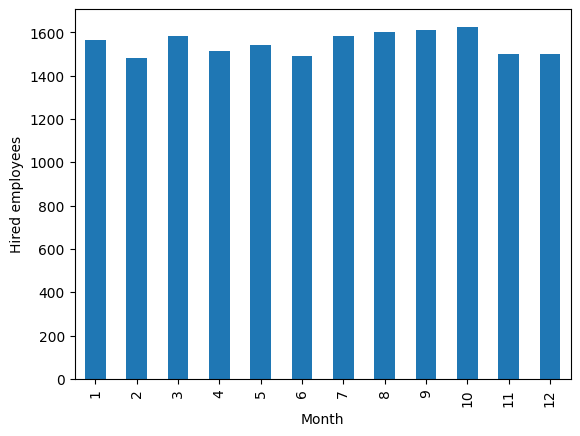

In [33]:
#Checking the correlation of Date of Joining with Target variable
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month =  data.copy()

data_month["Date of Joining"] = data_month["Date of Joining"].astype("datetime64[ns]") #specify time unit as nanoseconds
data_month["Date of Joining"].groupby(data_month["Date of Joining"].dt.month).count().plot(kind="bar", xlabel="Month", ylabel="Hired employees")




In [34]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
#Specify time unit as nanoseconds when converting to datetime64
data["Days"] = data["Date of Joining"].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days


,Days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


In [35]:
data.head()


,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Data of joining,Days
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,2008-09-30,273
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,2008-11-30,334
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,2008-11-03,307
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,2008-07-24,205
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29,2008-11-26,330


In [36]:
#checking for null values
data.isna().sum()


,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,0
Mental Fatigue Score,0
Burn Rate,0
Data of joining,0
Days,0


In [37]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000


In [38]:
corr = data.corr(numeric_only=True)
sns.set(rc={'figure.figsize':(14,12)})
fig = px.imshow(corr, text_auto=True,aspect='auto' )
fig.show()

In [39]:
#Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=['number'])


In [40]:
# Calculate the correlation matrix
correlation = numeric_data.corr()['Burn Rate']
print(correlation)


Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [43]:
# Check if the 'Days' column exists before attempting to drop it
if 'Days' in data.columns:
    data = data.drop(['Days'], axis=1)
else:
    print("Column 'Days' not found in DataFrame. Skipping drop operation.")

# Check if the 'Data of joining' column exists before attempting to drop it
if 'Data of joining' in data.columns:
    data = data.drop('Data of joining', axis=1)  # Change 'Data of Joining' to 'Data of joining'
else:
    print("Column 'Data of joining' not found in DataFrame. Skipping drop operation.")


Column 'Days' not found in DataFrame. Skipping drop operation.


In [44]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29


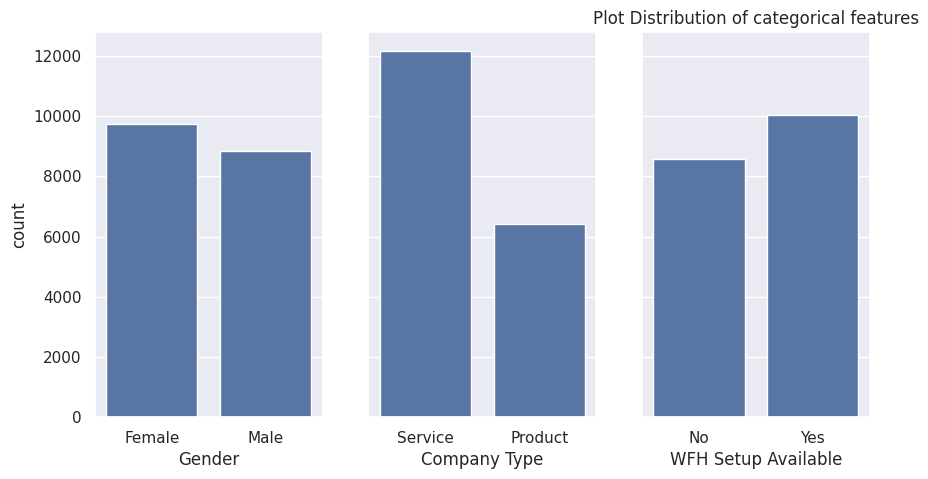

In [45]:
#Now analysing the categorical data from dataset
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.title("Plot Distribution of categorical features")
plt.show()



In [46]:
#One-Hot Encoding for categorical features

#Check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available',  'Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
  print("Error: One or more of the specified columns are not present in the DataFrame.")
  # Add debugging steps here to investigate why the columns are missing.
  # For example, print the existing columns:
  print(data.columns)

In [47]:
data

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2008-09-30,2,3.0,3.8,0.16,True,False,False
1,2008-11-30,1,2.0,5.0,0.36,True,True,True
3,2008-11-03,1,1.0,2.6,0.20,True,True,True
4,2008-07-24,3,7.0,6.9,0.52,True,False,False
5,2008-11-26,2,4.0,3.6,0.29,False,True,True
...,...,...,...,...,...,...,...,...
22743,2008-12-15,1,3.0,6.0,0.48,False,True,False
22744,2008-05-27,3,7.0,6.2,0.54,False,False,True
22746,2008-01-19,3,6.0,6.7,0.59,False,True,False
22748,2008-01-10,2,5.0,5.9,0.52,True,False,False


In [48]:
#Showing the Burn Rate on the basis of designation
fig = px.line(data, y='Burn Rate', color='Designation', title='Burn Rate on the basis of designation', color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(bargap=0.2)
fig.show()


In [49]:
data.dtypes


,0
Date of Joining,datetime64[ns]
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64
Company Type_Service,bool
WFH Setup Available_Yes,bool
Gender_Male,bool


PREPROCESSING

In [50]:
#Split df into X and Y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)


In [51]:
#Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Remove columns with DateTime64DType from x_train and x_test
for col in x_train.select_dtypes(include=['datetime64']).columns:
    x_train = x_train.drop(columns=[col])
    x_test = x_test.drop(columns=[col])

#Select only numerical features for scaling
numerical_features = x_train.select_dtypes(include=['number']).columns
x_train_num = x_train[numerical_features]
x_test_num = x_test[numerical_features]

#Scale X
scaler = StandardScaler()
scaler.fit(x_train_num)
x_train_scaled = pd.DataFrame(scaler.transform(x_train_num), index=x_train_num.index, columns=x_train_num.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test_num), index=x_test_num.index, columns=x_test_num.columns)

# Concatenate scaled numerical features with categorical features
x_train = pd.concat([x_train_scaled, x_train.drop(columns=numerical_features)], axis=1)
x_test = pd.concat([x_test_scaled, x_test.drop(columns=numerical_features)], axis=1)


In [52]:
x_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,True,False,True
14115,-0.159330,0.250185,-0.941481,True,False,False
8797,0.723327,0.250185,0.973179,True,False,False
1173,-1.041987,-1.214568,-0.579248,False,False,False
1941,-0.159330,0.738436,1.180169,False,True,True
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,False,True,False
21179,0.723327,0.250185,-1.044976,True,True,True
6327,0.723327,0.250185,0.093470,True,False,True
14933,-0.159330,0.250185,0.714441,True,False,True


In [53]:
y_train

,Burn Rate
8977,0.41
14115,0.34
8797,0.61
1173,0.35
1941,0.61
...,...
13453,0.78
21179,0.30
6327,0.42
14933,0.54


MODEL BUILDING

In [54]:
#from sklearn.linear_model import LinearRegression

#Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

#Fit the model to the training data
linear_regression_model.fit(x_train, y_train)


LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [55]:
#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:")
#Make Predictions on the test set
y_pred = linear_regression_model.predict(x_test)

#Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
#Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
print("Root Mean Squared Error (RMSE):", rmse)

#Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

#Calculate R-Squared Score
r2 = r2_score(y_test, y_pred)
print("R-Squared Score:", r2)


Linear Regression Model Performance Metrics:
Mean Squared Error (MSE): 0.0031569779113610717
Root Mean Squared Error (RMSE): 0.0561869905882231
Mean Absolute Error (MAE): 0.045950320326447726
R-Squared Score: 0.918822674247248
